In [1]:
import geopandas as gpd
from matplotlib import pyplot
import numpy
import earthpy as et
import rasterio as rio
from rasterio.plot import show

In [2]:
path='/data/raw_data/s2_aws/tiles/'

In [3]:
path_31TGJ=path+'31/T/GJ/'

In [4]:
path_exp=path_31TGJ+'2017/6/19/0/B8A_sur.tif'

In [5]:
path_groundtruth='/data/raw_data/wildfires-ground-truth/france/vars/'

In [6]:
open_file=gpd.read_file(path_groundtruth+'N_DFCI_CONTOUR_FEUX_2017_S_083.shp')

In [7]:
open_file

,ID_PROMETH,HEURE_DEBU,COMMUNE_EC,DATE_ECLOS,LIEU_DIT,SURFACE_SI,SURFACE_DE,QUALITE_DO,ENQUETE_FE,OBSERVATIO,geometry
0,2694,13h30,RAMATUELLE,2017-06-07,LA QUESSINE,1.572297e+05,"15,64 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,TONDEUSE,"MULTIPOLYGON (((996933.218 6240075.129, 996934..."
1,5135,19h35,LA CROIX-VALMER,2017-07-24,GIGARO,0.000000e+00,506 ha,IMAGE SATELLITE SENTINEL,RCCI_JETS OBJETS INCANDESCENTS,Synthèse IMAGE SENTINEL 2 et relevés GPS,"MULTIPOLYGON (((996138.181 6237162.083, 996167..."
2,0,None,TRIGANCE,2017-06-15,COLLINE D'ESTELLE,1.158500e+06,"115, 80 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"POLYGON ((976398.645 6294995.096, 976398.604 6..."
3,4669,23h00,LA LONDE-LES-MAURES,2017-07-25,VAL ROSE,1.423050e+07,"1423,05 ha",IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE_SUPPOSEE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((967149.726 6232341.320, 967169..."
4,4787,14h30,BORMES-LES-MIMOSAS,2017-07-07,SIOUVETTE,0.000000e+00,"4,47 ha",RELEVE GPS,RCCI_JETS OBJETS INCANDESCENTS,SUPPOSEE,"POLYGON ((979999.922 6240348.027, 979994.476 6..."
5,2601,13h26,BORMES-LES-MIMOSAS,2017-06-21,HAUT PARA,0.000000e+00,"3,17 ha",RELEVE GPS,RCCI_MACHINE-OUTILS,cause accidentelle (travaux forestiers),"POLYGON ((970608.889 6233760.310, 970587.150 6..."
6,5133,22h12,ARTIGUES,2017-07-24,COLLE PELADE,1.780380e+07,1704 ha,IMAGE SATELLITE SENTINEL,RCCI _MALVEILLANCE,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((934652.103 6275662.078, 934646..."
7,6496,16h28,FREJUS,2017-09-01,A8 CAPITOU,3.470000e+05,"34,7 ha",GPS,RCCI_JETS OBJETS INCANDESCENTS,None,"MULTIPOLYGON (((1004320.901 6272550.143, 10042..."
8,6782,22h00,HYERES,2017-09-02,CHEMIN DES MAURES,4.318000e+06,431 ha,RELEVE TERRAIN,RCCI_MALVEILLANCE,None,"MULTIPOLYGON (((959136.098 6233651.015, 959161..."
9,0,None,COMPS/ARTUBY,2017-10-08,LA VERRERIE,2.381340e+02,"238,13 ha",IMAGE SATELLITE SENTINEL,CANJUERS TIRS MUNITIONS,TRAITEMENT IMAGE SENTINEL 2,"MULTIPOLYGON (((980684.678 6292938.727, 980684..."


In [8]:
open_file.total_bounds

array([ 925599.38517399, 6226802.40878843, 1004370.88129336,
       6296273.15835397])

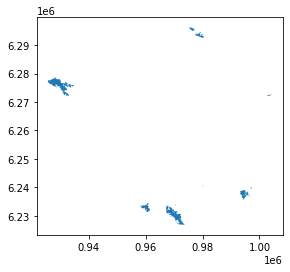

In [9]:
open_file.plot()

Plotting the shape file polygon with colour map and a legend on the ignition data

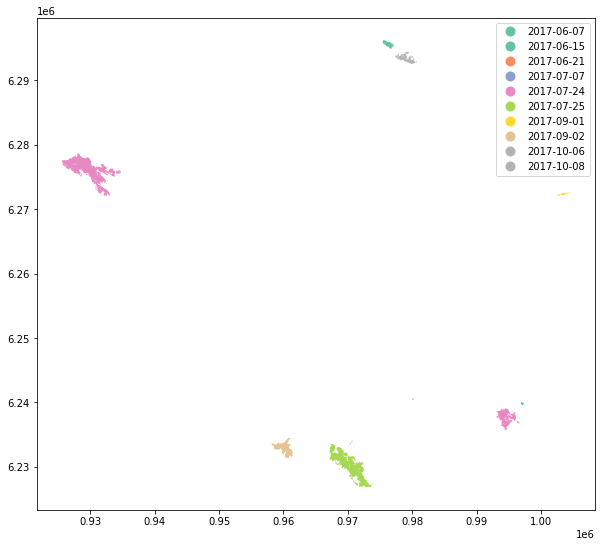

In [10]:
open_file.plot(column='DATE_ECLOS', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=45, 
                         cmap="Set2")

Need rasterio and earthpy packages to open up GeoTIFF file:

In [11]:
open_s2_file=rio.open(path_exp)

In [12]:
open_s2_file.bounds

BoundingBox(left=699960.0, bottom=4790220.0, right=809760.0, top=4900020.0)

Open the metadata:

In [13]:
open_s2_file.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 5490,
 'height': 5490,
 'count': 1,
 'crs': CRS.from_epsg(32631),
 'transform': Affine(20.0, 0.0, 699960.0,
        0.0, -20.0, 4900020.0)}

Show the resolution:

In [14]:
open_s2_file.res

(20.0, 20.0)

Check the EPSG code

In [15]:
et.epsg['32631']

'+proj=utm +zone=31 +datum=WGS84 +units=m +no_defs'

In [16]:
 print(open_s2_file.tags(ns='IMAGE_STRUCTURE'))

{'COMPRESSION': 'DEFLATE', 'INTERLEAVE': 'BAND'}


In [17]:
open_s2_file.dataset_mask()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

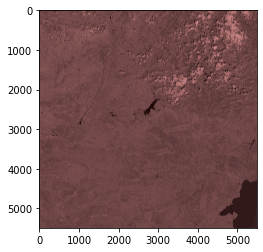

In [18]:
pyplot.imshow(open_s2_file.read(1), cmap='pink')

In [19]:
path_2=path_31TGJ+'2017/6/19/0/B11_sur.tif'

In [20]:
open_s2_file2=rio.open(path_2)

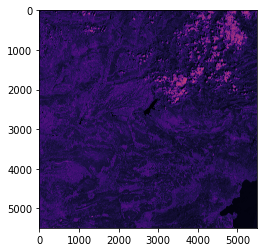

In [21]:
pyplot.imshow(open_s2_file2.read(1), cmap='magma')

Experiment with portugal data

In [22]:
path_portugal_gt='/data/raw_data/wildfires-ground-truth/portugal'

In [23]:
open_portugal_gt_2015=gpd.read_file(path_portugal_gt+'/AArdida2015_ETRS89PTTM06_20181017.shp')

In [24]:
open_portugal_gt_2015

,COD_OCO,AREA_HA,FONTE,ANO,OBSERVA,Distrito,Tipo,Reacendime,Fogacho,Incendio,...,Causa,TipoCausa,DHfim,Duracao,FonteAlert,x_ETRS_PT,y_ETRS_PT,DHinicio,NCCO,geometry
0,None,2678.940142,GTF/GNR,2015,None,0,0,0.0,0.0,0.0,...,0,0,0,0.0,0,0.0,0.0,0,0.0,"MULTIPOLYGON (((49390.344 83314.653, 49372.121..."
1,None,1328.408144,GTF/GNR,2015,None,0,0,0.0,0.0,0.0,...,0,0,0,0.0,0,0.0,0.0,0,0.0,"MULTIPOLYGON (((-17903.251 -21115.211, -17886...."
2,None,1389.713556,GTF/GNR,2015,None,0,0,0.0,0.0,0.0,...,0,0,0,0.0,0,0.0,0.0,0,0.0,"MULTIPOLYGON (((-44828.225 232098.203, -44831...."
3,None,2.228094,GTF/GNR,2015,BAIRRO,0,0,0.0,0.0,0.0,...,0,0,0,0.0,0,0.0,0.0,0,0.0,"POLYGON ((-25547.960 188468.389, -25555.590 18..."
4,None,49.293793,GTF/GNR,2015,None,0,0,0.0,0.0,0.0,...,0,0,0,0.0,0,0.0,0.0,0,0.0,"POLYGON ((6681.755 195472.880, 6658.741 195455..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,RO21559,2.090411,GNR/GTF,2015,LocalizaÃ§Ã£o e Ã¡reas editadas no SGIF,11,None,NaN,NaN,NaN,...,None,None,None,NaN,None,NaN,NaN,None,NaN,"POLYGON ((-84912.076 -82317.846, -84873.081 -8..."
1649,RO215502,0.151691,GNR/GTF,2015,LocalizaÃ§Ã£o e Ã¡reas editadas no SGIF,11,None,NaN,NaN,NaN,...,None,None,None,NaN,None,NaN,NaN,None,NaN,"POLYGON ((-81504.701 -84184.662, -81494.152 -8..."
1650,RO215593,2.018244,GNR/GTF,2015,LocalizaÃ§Ã£o e Ã¡reas editadas no SGIF,11,None,NaN,NaN,NaN,...,None,None,None,NaN,None,NaN,NaN,None,NaN,"POLYGON ((-89658.493 -83987.556, -89659.042 -8..."
1651,RO215647,3.885516,GNR/GTF,2015,Editado com imagem TerraServer / MunicÃ­pio de...,11,None,NaN,NaN,NaN,...,None,None,None,NaN,None,NaN,NaN,None,NaN,"POLYGON ((-83840.462 -96906.280, -83819.022 -9..."


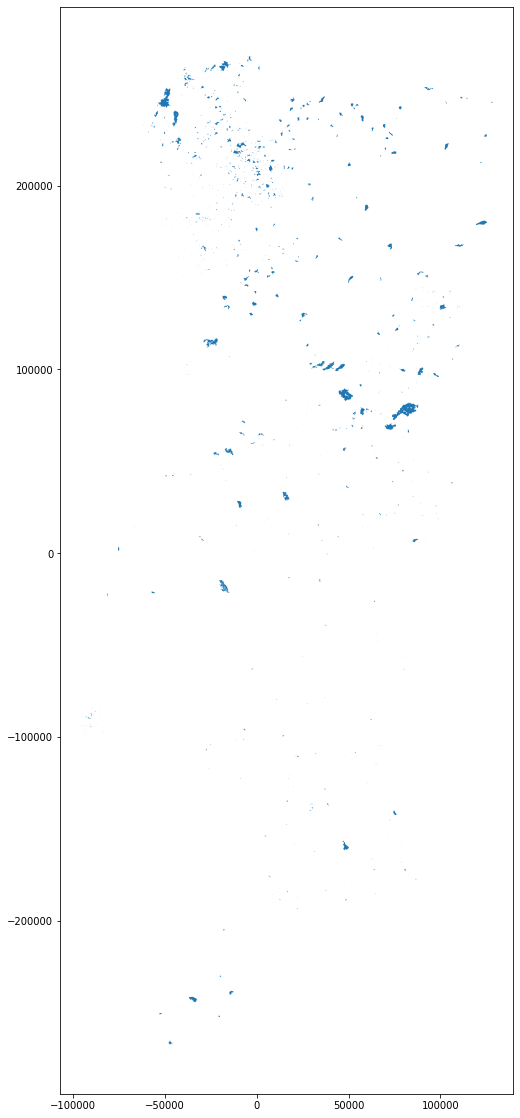

In [25]:
open_portugal_gt_2015.plot(figsize=(20,20))

In [26]:
open_portugal_gt_2016=gpd.read_file(path_portugal_gt+'/AArdida2016_ETRS89PTTM06_20190813.shp')

In [27]:
open_portugal_gt_2016

,Ano,COD_OCO,FONTE,AREA_HA,COD_OCO_,Distrito,Tipo,Reacendime,Queimada,Falso_Alar,...,TipoCausa,DHInicio,DHFim,Duracao,Queima,lat,lon,NCCO,OBS,geometry
0,2016.0,AT1161118,GNR/GTF,0.1838,AT1161118,?vora,Florestal,0.0,0.0,0.0,...,Negligente,2016-12-07 12:10:00.000,2016-12-07 14:50:00.000,160.0,0.0,38:44:42.3888,7:31:56.9028,2016070027090,None,"POLYGON ((52163.635 -102279.846, 52167.054 -10..."
1,2016.0,AT116190,GNR/GTF,0.0792,AT116190,?vora,Agr?cola,0.0,0.0,0.0,...,Desconhecida,2016-06-06 14:12:00.000,2016-06-06 15:00:00.000,48.0,0.0,38:25:06,07:32:50,2016070012201,None,"POLYGON ((51134.240 -138591.923, 51136.435 -13..."
2,2016.0,AT116191,GNR/GTF,0.0637,AT116191,?vora,Agr?cola,0.0,0.0,0.0,...,Negligente,2016-06-07 14:47:00.000,2016-06-07 16:10:00.000,83.0,0.0,38:37:25,08:12:03,2016070012297,None,"POLYGON ((-5887.517 -115988.705, -5885.488 -11..."
3,2016.0,AT116274,GNR/GTF,13.1630,AT116274,?vora,Agr?cola,0.0,0.0,0.0,...,Negligente,2016-06-17 17:47:00.000,2016-06-17 21:45:00.000,238.0,0.0,38:28:24,07:19:41,2016070013101,None,"POLYGON ((70420.942 -132565.022, 70420.952 -13..."
4,2016.0,AT116291,GNR/GTF,1.5200,AT116291,?vora,Florestal,0.0,0.0,0.0,...,Desconhecida,2016-06-22 17:57:00.000,2016-06-22 20:35:00.000,158.0,0.0,38:48:10,08:23:28,2016070013506,None,"POLYGON ((-22315.211 -96048.259, -22307.054 -9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,2016.0,DM2161944,GNR/GTF,71.8097,None,None,None,NaN,NaN,NaN,...,None,None,None,NaN,NaN,None,None,None,DM2161944/2161945/2162098/2162262/2162833/2163...,"MULTIPOLYGON (((-38282.032 180884.946, -38276...."
2842,2016.0,DM216887,GNR/GTF,0.3187,None,None,None,NaN,NaN,NaN,...,None,None,None,NaN,NaN,None,None,None,DM216887/216919,"POLYGON ((-34261.725 183784.062, -34262.261 18..."
2843,2016.0,DM2161035,GNR/GTF,0.5308,None,None,None,NaN,NaN,NaN,...,None,None,None,NaN,NaN,None,None,None,DM2161035,"POLYGON ((-31729.480 180503.724, -31729.662 18..."
2844,2016.0,DM2161260,GNR/GTF,0.3494,None,None,None,NaN,NaN,NaN,...,None,None,None,NaN,NaN,None,None,None,DM2161260,"POLYGON ((-36606.922 180687.151, -36605.875 18..."


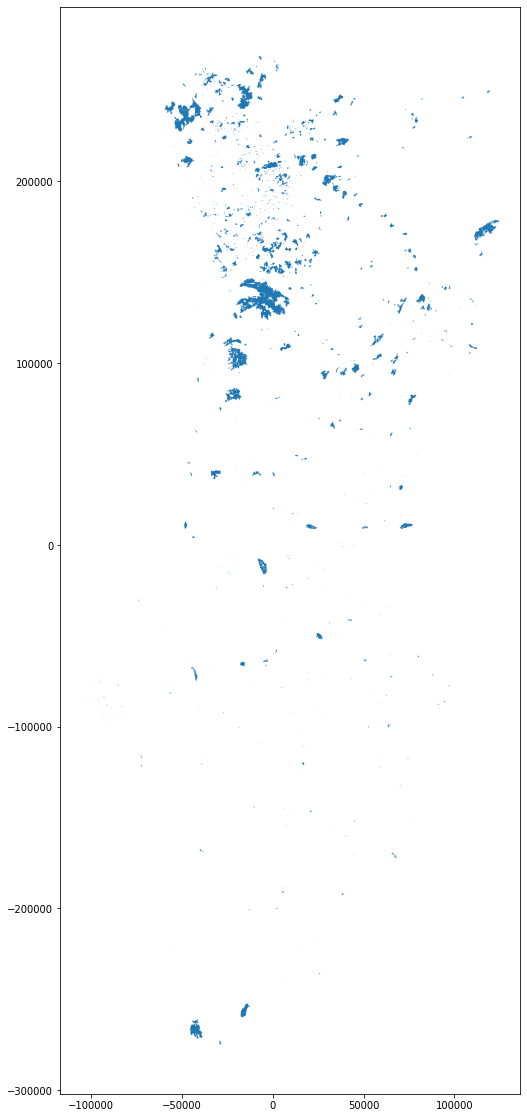

In [28]:
open_portugal_gt_2016.plot(figsize=(20,20))

In [29]:
path_spain_gt='/data/raw_data/wildfires-ground-truth/spain/catalonia'

In [30]:
open_spain_gt_2017=gpd.read_file(path_spain_gt+'/incendis2017.shp')

In [31]:
open_spain_gt_2017

,CODI_FINAL,DATA_INCEN,MUNICIPI,GRID_CODE,geometry
0,2017430034,07/03/17,Roquetes,2,"POLYGON Z ((286181.375 4518003.914 -0.000, 286..."
1,2017430058,16/05/17,La Fatarella,2,MULTIPOLYGON Z (((287836.962 4558406.075 -0.00...
2,2017250033,14/06/17,Oliola,2,"POLYGON Z ((348049.984 4629828.981 -0.000, 348..."
3,2017170036,14/06/17,Sils,2,"POLYGON Z ((477370.402 4631747.400 -0.000, 477..."
4,2017080061,15/06/17,Cardedeu,2,"POLYGON Z ((447346.433 4610300.653 -0.000, 447..."
5,2017250114,17/06/17,Artesa de Lleida,2,"POLYGON Z ((306304.666 4601774.767 -0.000, 306..."
6,2017250043,24/06/17,Agramunt,2,"POLYGON Z ((342228.880 4632711.981 -0.000, 342..."
7,2017080073,22/06/17,Sant FruitÃ³s de Bages,2,MULTIPOLYGON Z (((405698.218 4620866.504 -0.00...
8,2017080078,23/06/17,Esparraguera,2,"POLYGON Z ((404962.104 4596786.224 -0.000, 404..."
9,2017250047,28/06/17,La Baronia de Rialb,2,"POLYGON Z ((350018.836 4646776.693 -0.000, 350..."


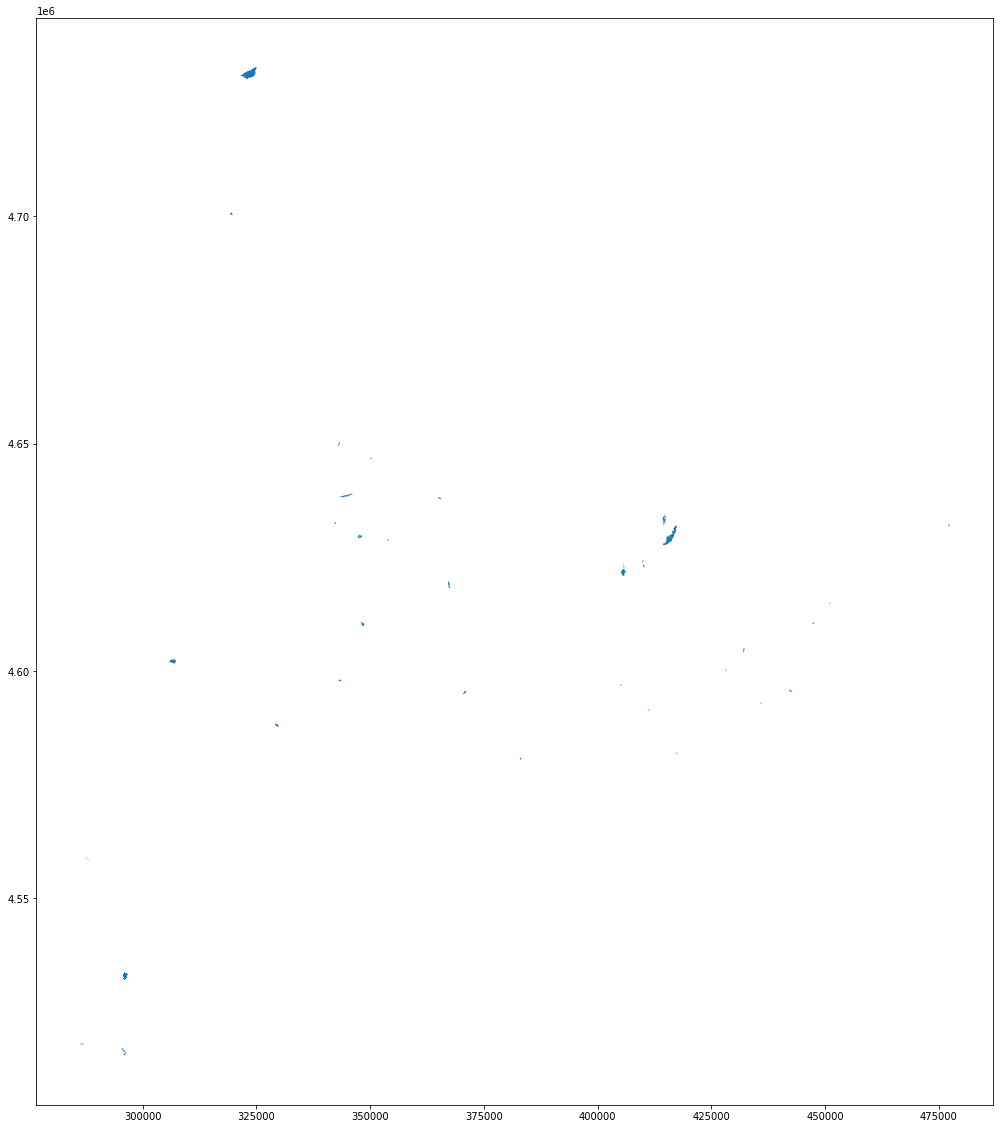

In [32]:
open_spain_gt_2017.plot(figsize=(20,20))

In [33]:
path_italy_gt='/data/raw_data/wildfires-ground-truth/italy/romana'

In [34]:
open_italy_gt_2017=gpd.read_file(path_italy_gt+'/incendi_rer2017_dati_cfs.shp')

In [35]:
open_italy_gt_2017

,VINCOLI,LOCALITA,DATA_INCEN,COM,NOME_COM,NOME_PROV,COD_UFF,N_SCHEDA,ANNO_RIF,MACRO_UDS,INC_ID,Shape_Leng,Shape_Area,geometry
0,Vincolo derivante da uso del suolo di tipo Bosco,Rocchetta,03/08/2017,040044,SARSINA,Forlì - Cesena,7650,3.0,2017,BOSCO,1069,386.167269,6605.176485,"POLYGON ((1751754.069 4863156.595, 1751756.324..."
1,Uso del suolo diverso da Bosco o Pascolo,RUSTIGAZZO,13/03/2017,033026,LUGAGNANO VAL D'ARDA,Piacenza,7199,1.0,2017,ALTRO,1070,165.092039,1066.562497,"POLYGON ((1558227.851 4958932.549, 1558227.891..."
2,Uso del suolo diverso da Bosco o Pascolo,Molina,16/07/2017,033044,VERNASCA,Piacenza,7199,2.0,2017,ALTRO,1071,259.426506,3018.619894,"POLYGON ((1565059.955 4961675.433, 1565019.364..."
3,Uso del suolo diverso da Bosco o Pascolo,CASE MOLINA,16/08/2017,033044,VERNASCA,Piacenza,7199,4.0,2017,ALTRO,1072,68.553277,191.805245,"POLYGON ((1565037.478 4961454.679, 1565031.057..."
4,Uso del suolo diverso da Bosco o Pascolo,MOLINO TEODORO,30/08/2017,033044,VERNASCA,Piacenza,7199,5.0,2017,ALTRO,1073,203.365076,1939.755578,"POLYGON ((1563798.522 4960003.480, 1563777.566..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Vincolo derivante da uso del suolo di tipo Bosco,Pian del voglio,21/08/2017,037051,SAN BENEDETTO VAL DI SAMBRO,Bologna,7615,3.0,2017,BOSCO,1201,54.521087,213.501859,"POLYGON ((1676986.482 4892848.516, 1676983.482..."
174,Uso del suolo diverso da Bosco o Pascolo,vedriano,18/08/2017,035018,CANOSSA,Reggio nell'Emilia,848,1.0,2017,ALTRO,1202,1479.820484,40466.557672,"MULTIPOLYGON (((1612102.133 4930649.649, 16121..."
175,Vincolo derivante da uso del suolo di tipo Bosco,vedriano,18/08/2017,035018,CANOSSA,Reggio nell'Emilia,848,1.0,2017,BOSCO,1202,2873.994411,153120.764972,"POLYGON ((1612324.093 4930878.637, 1612319.048..."
176,Vincolo derivante da uso del suolo di tipo Bosco,Monte Aquilone,14/07/2017,099023,NOVAFELTRIA,Rimini,ComReg2018,999901.0,2017,BOSCO,1203,68.683514,223.895552,"POLYGON ((1761079.565 4866944.730, 1761080.192..."


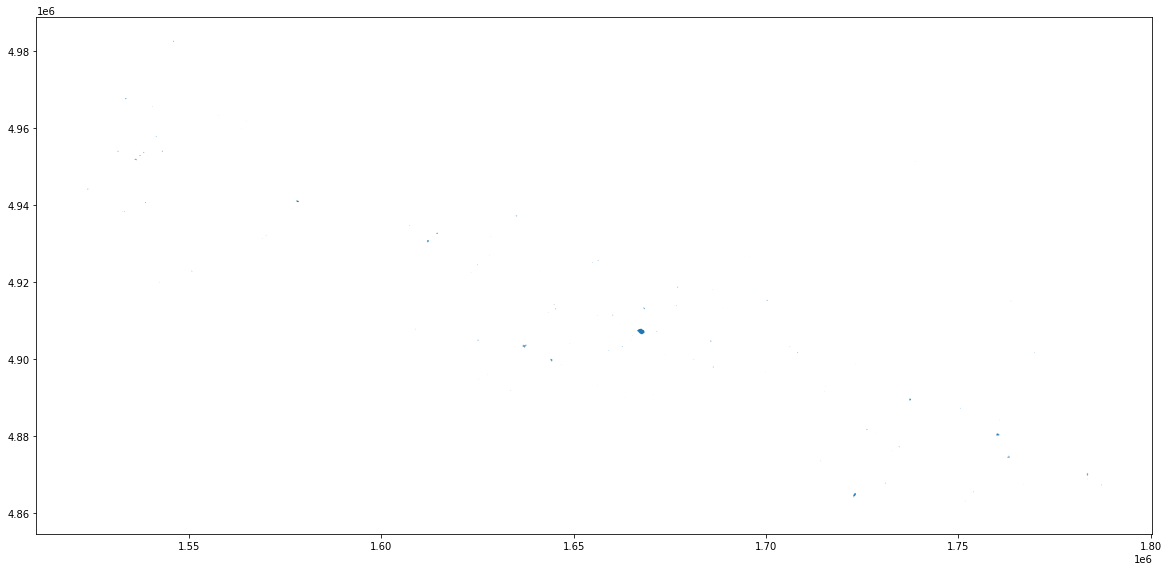

In [36]:
open_italy_gt_2017.plot(figsize=(20,20))

In [37]:
open_jp2=rio.open('/data/temporary/robert/ds-wildfire/data/scenes/31/T/GJ/2015_07_30.jp2')

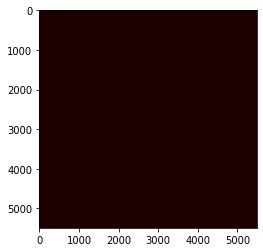

In [40]:
pyplot.imshow(open_jp2.read(1), cmap='pink')